<a href="https://colab.research.google.com/github/Gus-1003/DataScience-Minhas_Praticas/blob/main/RNAs/projeto_car.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Leitura de arquivo

In [16]:
df= pd.read_csv("https://raw.githubusercontent.com/Gus-1003/DataScience-Minhas_Praticas/main/RNAs/car_evaluation.csv")
df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


# Pré-processamento

## Organização do dataset

In [17]:
# Renomeando os atributos
df = df.rename(columns={
    'vhigh': 'preço',
    'vhigh.1': 'manutenção',
    '2': 'qtd_portas',
    '2.1': 'qtd_pessoas',
    'small': 'porta_mala',
    'low': 'segurança',
    'unacc': 'classe'
})

column_mappings = {
    'preço': {'vhigh': 3, 'high': 2, 'med': 1, 'low': 0},
    'manutenção': {'vhigh': 3, 'high': 2, 'med': 1, 'low': 0},
    'qtd_portas': {'2': 2, '3': 3, '4': 4, '5more': 5},
    'qtd_pessoas': {'2': 2, '4': 4, 'more': 5},
    'porta_mala': {'small': 0, 'med': 1, 'big': 2},
    'segurança': {'low': 0, 'med': 1, 'high': 2},
    'classe': {'vgood': 3, 'good': 2, 'acc': 1, 'unacc': 0}
}

# Aplicando as transformações de renomeação
df['preço'] = df['preço'].map(column_mappings['preço'])
df['manutenção'] = df['manutenção'].map(column_mappings['manutenção'])
df['qtd_portas'] = df['qtd_portas'].map(column_mappings['qtd_portas'])
df['qtd_pessoas'] = df['qtd_pessoas'].map(column_mappings['qtd_pessoas'])
df['porta_mala'] = df['porta_mala'].map(column_mappings['porta_mala'])
df['segurança'] = df['segurança'].map(column_mappings['segurança'])
df['classe'] = df['classe'].map(column_mappings['classe'])

df

,preço,manutenção,qtd_portas,qtd_pessoas,porta_mala,segurança,classe
0,3,3,2,2,0,1,0
1,3,3,2,2,0,2,0
2,3,3,2,2,1,0,0
3,3,3,2,2,1,1,0
4,3,3,2,2,1,2,0
...,...,...,...,...,...,...,...
1722,0,0,5,5,1,1,2
1723,0,0,5,5,1,2,3
1724,0,0,5,5,2,0,0
1725,0,0,5,5,2,1,2


## Análise estatística

In [18]:
df.describe()

,preço,manutenção,qtd_portas,qtd_pessoas,porta_mala,segurança,classe
count,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000
mean,1.499131,1.499131,3.500869,3.667632,1.000579,1.000579,0.415171
std,1.118098,1.118098,1.118098,1.247296,0.816615,0.816615,0.740847
min,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000
25%,0.500000,0.500000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,4.000000,4.000000,1.000000,1.000000,0.000000
75%,2.000000,2.000000,4.500000,5.000000,2.000000,2.000000,1.000000
max,3.000000,3.000000,5.000000,5.000000,2.000000,2.000000,3.000000


# Visualização gráfica

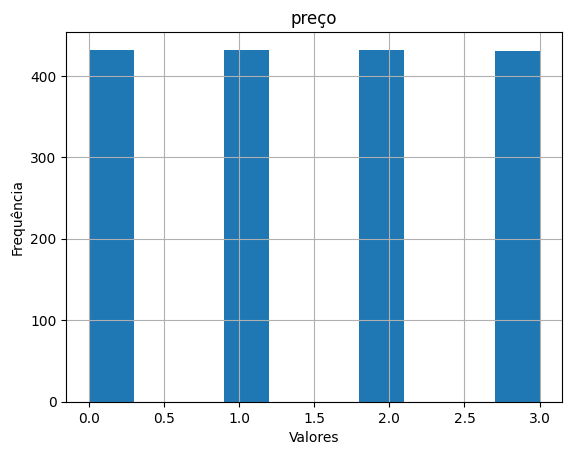

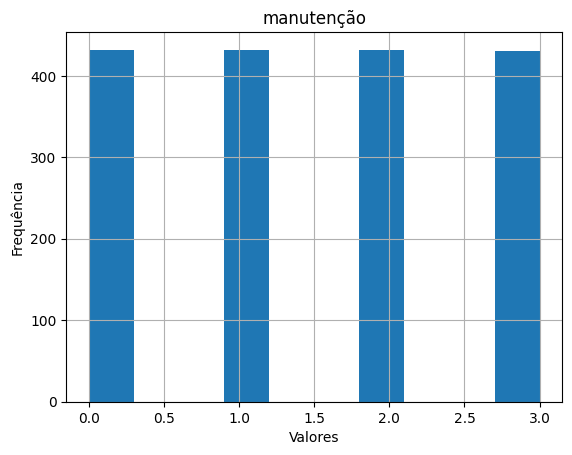

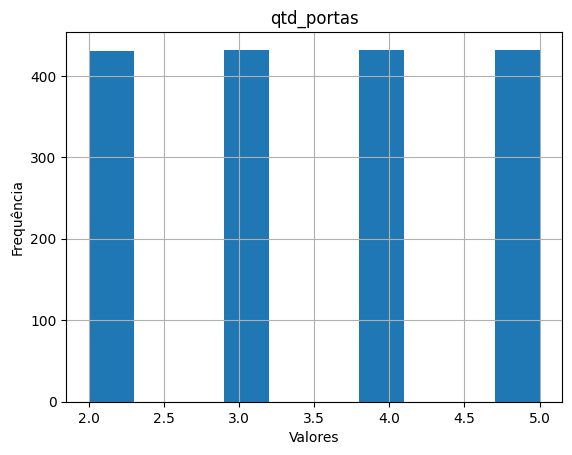

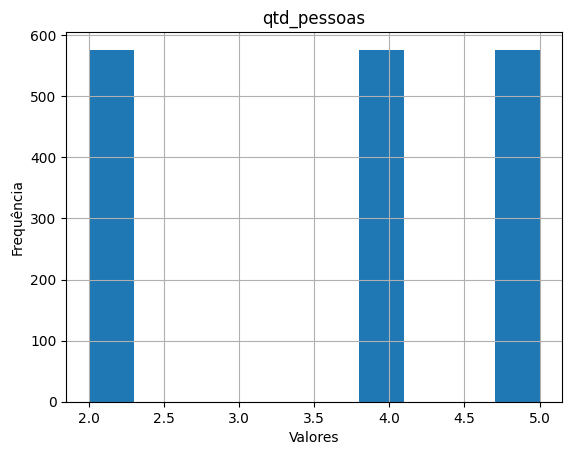

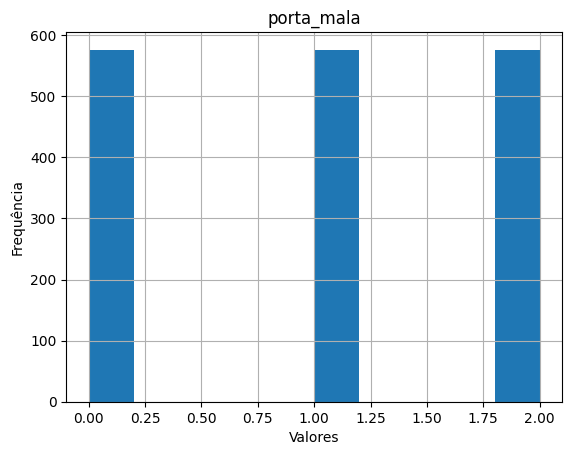

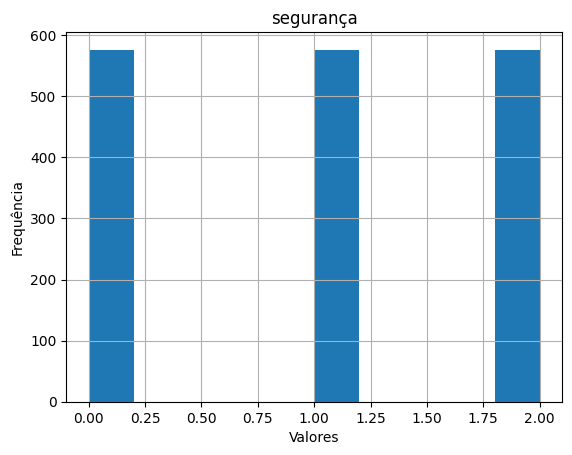

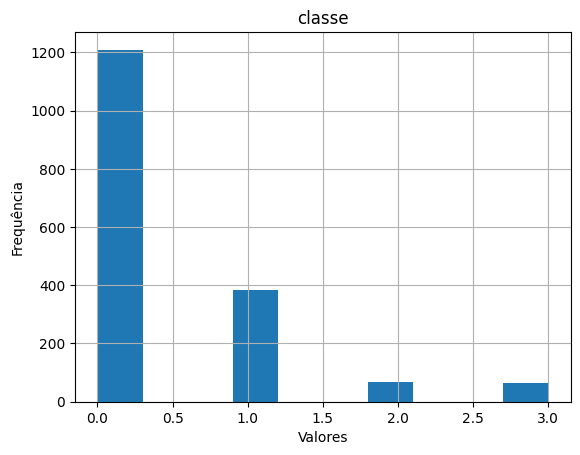

In [20]:
# Criação dos gráficos de distribuição para cada coluna
for column in df.columns:
    plt.figure()
    df[column].hist()
    plt.title(column)
    plt.xlabel('Valores')
    plt.ylabel('Frequência')

# Exibe os gráficos
plt.show()

classes:
* 0 -> intolerável
* 1 -> razoável
* 2 -> bom
* 3 -> muito bom


## Distribuição da classe

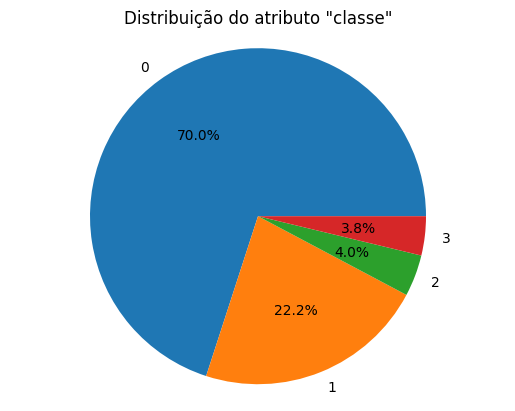

In [21]:
# Contagem dos valores do atributo "classe"
classe_counts = df['classe'].value_counts()

# Criação do gráfico de pizza
plt.figure()
plt.pie(classe_counts, labels=classe_counts.index, autopct='%1.1f%%')
plt.title('Distribuição do atributo "classe"')
plt.axis('equal')

# Exibe o gráfico
plt.show()

## Matriz de Correlação


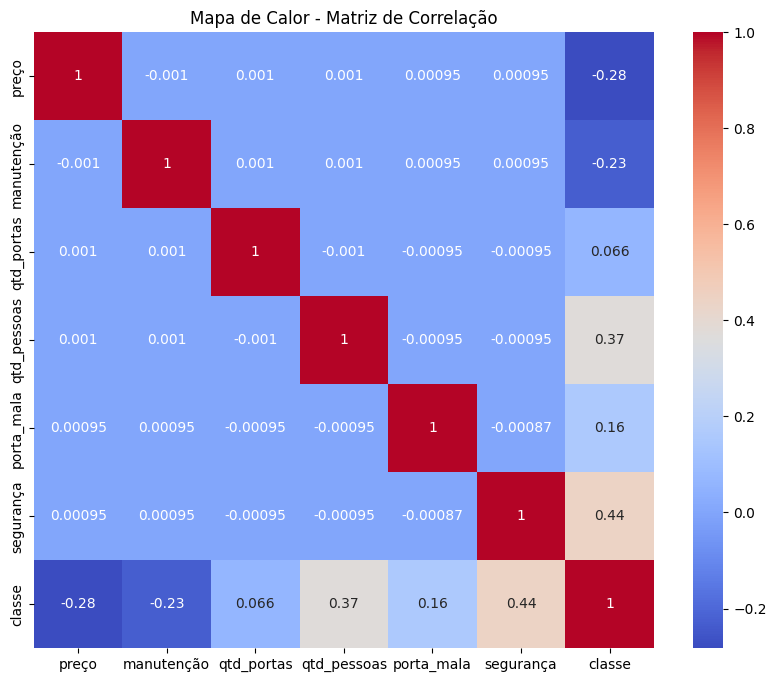

In [37]:
# Cálculo da matriz de correlação
correlation_matrix = df.corr()

# Criação do mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor - Matriz de Correlação')
plt.show()

# Processamento:

## Divisões entre atributos

### Entradas vs Saídas

In [22]:
# Divisão entre atributos de entrada (X) e atributo de saída (y)
X = df.drop('classe', axis=1).values
y = df['classe'].values

### Treinos vs Testes

In [26]:
# Divisão em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Criação do modelo:

In [27]:
# Construção do modelo de rede neural
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(X.shape[1],)))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(4, activation='softmax'))  # 4 classes possíveis

In [28]:
# Compilação do modelo
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Treinamento:

In [29]:
# Treinamento do modelo
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

## Validação:

In [30]:
# Avaliação do modelo
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)


# Resultados:

In [32]:
print('Accuracy:', accuracy)
print('loss:', loss)

Accuracy: 0.939306378364563
loss: 0.14501480758190155


In [34]:
# Cálculo da matriz de correlação
correlation_matrix = df.corr()

# Exibição da matriz de correlação
correlation_matrix

,preço,manutenção,qtd_portas,qtd_pessoas,porta_mala,segurança,classe
preço,1.000000,-0.001043,0.001043,0.001039,0.000952,0.000952,-0.282488
manutenção,-0.001043,1.000000,0.001043,0.001039,0.000952,0.000952,-0.232128
qtd_portas,0.001043,0.001043,1.000000,-0.001039,-0.000952,-0.000952,0.065662
qtd_pessoas,0.001039,0.001039,-0.001039,1.000000,-0.000949,-0.000949,0.373253
porta_mala,0.000952,0.000952,-0.000952,-0.000949,1.000000,-0.000869,0.157617
segurança,0.000952,0.000952,-0.000952,-0.000949,-0.000869,1.000000,0.439171
classe,-0.282488,-0.232128,0.065662,0.373253,0.157617,0.439171,1.000000


In [44]:
# Divisão entre atributos de entrada (X) e atributo de saída (y)
X = df.drop('classe', axis=1).values
y = df['classe'].values

# Conversão das colunas categóricas em one-hot encoding
X = tf.keras.utils.to_categorical(X)

# Divisão em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajuste das dimensões do atributo de saída (y)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=4)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=4)

# Construção do modelo de rede neural
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(X.shape[1],)))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(4, activation='softmax'))  # 4 classes possíveis

# Compilação do modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Treinamento do modelo
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

# Previsões do modelo
y_pred = model.predict_classes(X_test)

# Cálculo da matriz de confusão
confusion_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred)

# Criação do mapa de calor para a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues')
plt.title('Matriz de Confusão')
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.show()


ValueError: ignored